<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/dz_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

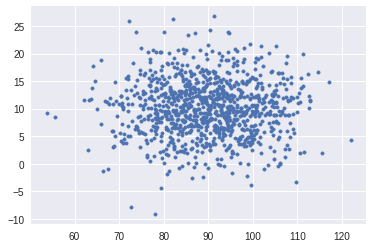

In [11]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим нормально распределенную случайную величину
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)
plt.scatter(x, y, marker='.')
#print(y)

Нарисовать плотность распределения полученной выборки x.

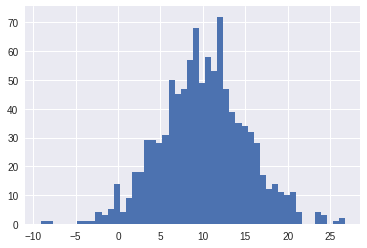

In [17]:
plt.hist(y,50)
plt.show()

Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки. Построить график зависимости (корелляции) x от y.

In [14]:
X = np.vstack((x, y)).T
# Матрица масштабирования
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])
# Умножаем исходные данные на матрицу масштабирования
Y = X.dot(Scale)
print('X')
print(X)
print('Результат')
print(Y)

X
[[ 86.71843532   9.63602916]
 [ 89.46613825  14.19393158]
 [ 81.21352338   8.18005529]
 ...
 [ 99.52949605   4.95920119]
 [101.07947802   3.9420766 ]
 [ 85.51231739  10.04693045]]
Результат
[[60.70290472 32.76249913]
 [62.62629677 48.25936737]
 [56.84946636 27.812188  ]
 ...
 [69.67064724 16.86128406]
 [70.75563461 13.40306044]
 [59.85862217 34.15956352]]


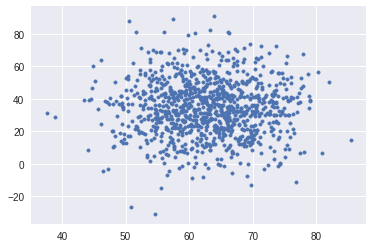

In [16]:
plt.scatter(Y[:,0], Y[:,1], marker = '.')

Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x. 

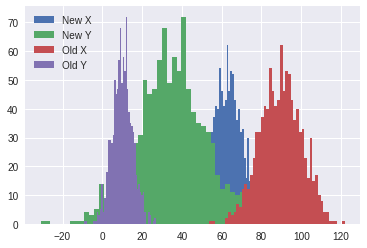

In [23]:
plt.hist(Y[:,0],50)
plt.hist(Y[:,1],50)
plt.hist(X[:,0],50)
plt.hist(X[:,1],50)
plt.legend(['New X', 'New Y', 'Old X', 'Old Y'])
plt.show()

Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0? 

-0.008856859614212856


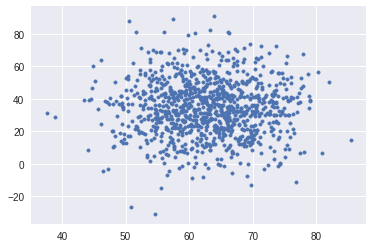

In [24]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(Y[:,0], Y[:,1])
plt.scatter(Y[:,0], Y[:,1], marker='.')
print(corr)

Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

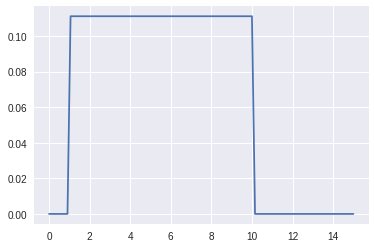

In [26]:
a = 1
b = 10

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

x = np.linspace(0, 15, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

Найти на графике примеры выброса. Что они означают?  

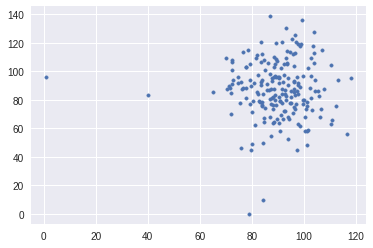

Найти корелляцию в следующих данных: 

In [32]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [46]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


-0.2083170484878848


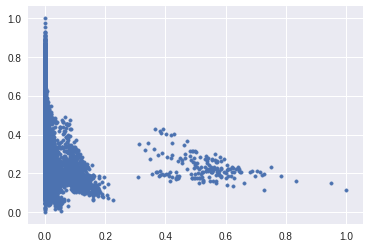

In [48]:
X_4046 = df_norm[0]
Y_avgPrice = df_norm[1]

corr, p_value = pearsonr(X_4046, Y_avgPrice)
plt.scatter(X_4046, Y_avgPrice, marker='.')
print(corr)

Очищаем выбросы. 

In [50]:
df_norm[0].isna().sum()

0

In [51]:
df_norm[1].isna().sum()

0

-0.34185918543177973


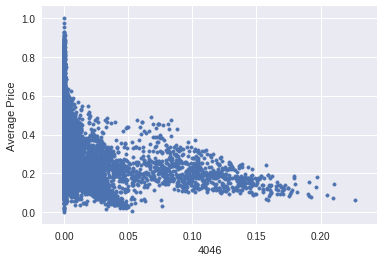

In [53]:
df_filtered = df_norm[df_norm[0] < 0.3]
X_4046 = df_filtered[0]
Y_avgPrice = df_filtered[1]

corr, p_value = pearsonr(X_4046, Y_avgPrice)
plt.scatter(X_4046, Y_avgPrice, marker='.')
plt.xlabel('4046')
plt.ylabel('Average Price')
print(corr)

-0.3932879016978984


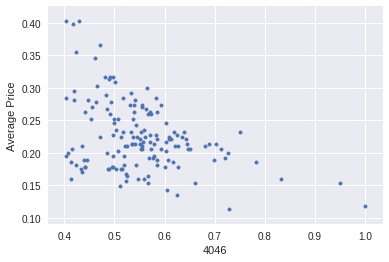

In [55]:
df_filtered = df_norm[df_norm[0] > 0.4]
X_4046 = df_filtered[0]
Y_avgPrice = df_filtered[1]

corr, p_value = pearsonr(X_4046, Y_avgPrice)
plt.scatter(X_4046, Y_avgPrice, marker='.')
plt.xlabel('4046')
plt.ylabel('Average Price')
print(corr)